In [1]:
# 코랩은 폰트 설치도 필요한듯
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
# 한글깨짐 방지코드
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.family'] = 'Nanum Brush Script' # Windows
matplotlib.rc('font', family='NanumBarunGothic')

matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
import pandas as pd
data = {
    '영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}
df = pd.DataFrame(data)
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


# 1) 영화 데이터를 활용하여 x축은 영화, y축은 평점인 막대그래프를 만드시오.

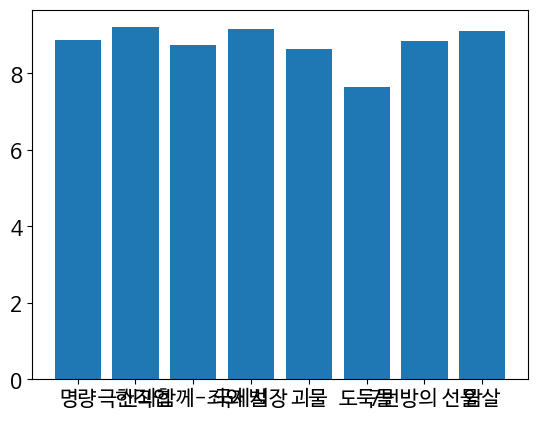

In [4]:
plt.bar(df['영화'], df['평점'])
plt.show()

# 2) 1의 그래프에
- 제목 : 국내 Top 8 영화 평점 정보
- x축 label = 영화(90도 회전)
- y축 label = 평점

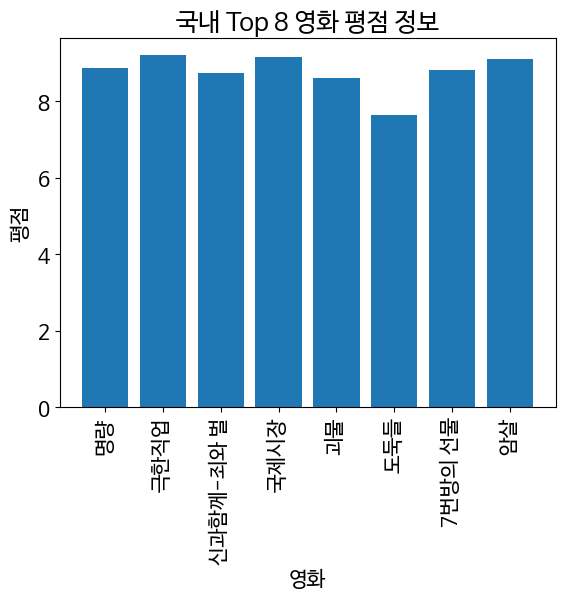

In [5]:
plt.bar(df['영화'], df['평점'])
plt.title('국내 Top 8 영화 평점 정보')
plt.xlabel('영화')
plt.ylabel('평점')
plt.xticks(rotation=90)
plt.show()

# 3) 개봉 연도별 평점 변화 추이를 꺾은선 그래프로 그리시오.


In [6]:
df_group = df.groupby('개봉 연도').mean()
df_group

<ipython-input-6-cad7f454ff0c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group = df.groupby('개봉 연도').mean()


,관객 수,평점
개봉 연도,,
2006,1301.0,8.62
2012,1298.0,7.64
2013,1281.0,8.83
2014,1593.5,9.02
2015,1270.0,9.10
2017,1441.0,8.73
2019,1626.0,9.20


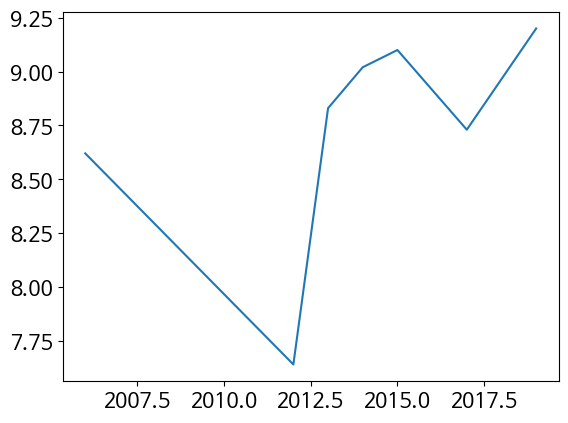

In [7]:
plt.plot(df_group.index,df_group['평점'])
plt.show()

# 4) 3번그래프에
- marker = 'o'
- x축 눈금 = 5년 단위
- y축 범위 최소7, 최대10

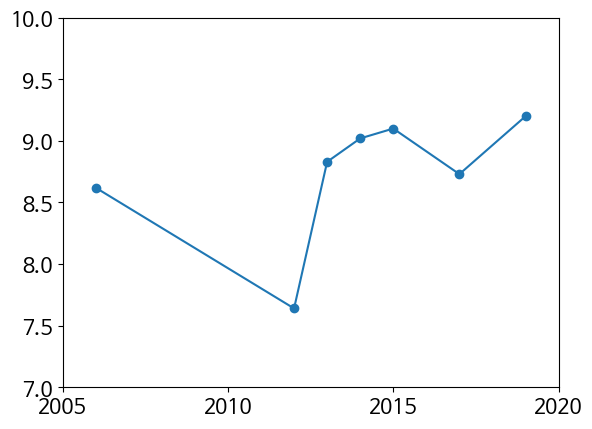

In [8]:
plt.plot(df_group.index, df_group['평점'], marker = 'o')
plt.ylim(7,10)
plt.xticks([2005,2010,2015,2020])
plt.show()

# 5) 평점이 9점 이상인 영화의 비율을 확인할 수 있는 원그래프
- label = 9점 이상 / 9점 미만
- 퍼센트 = 소수점 첫째자리까지 표시
- 범례 : 그래프 우측에 표시

In [9]:
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


In [10]:
df.loc[df['평점'] >= 9, '영화'].count()

3

In [11]:
df.loc[~(df['평점'] >= 9), '영화'].count()

5

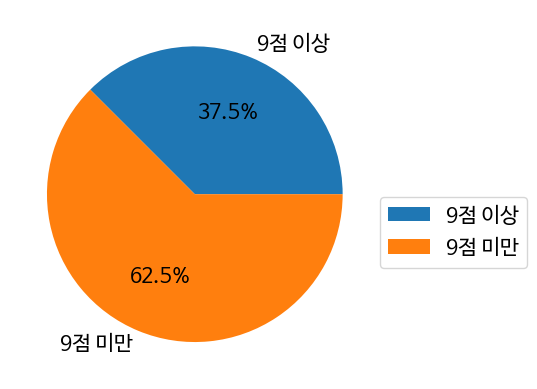

In [12]:
# labels = []
plt.pie([df.loc[df['평점'] >= 9, '영화'].count(), df.loc[~(df['평점'] >= 9), '영화'].count()], autopct='%.1f%%', labels=['9점 이상', '9점 미만'])
plt.legend(['9점 이상', '9점 미만'], loc=(1,0.3))
plt.show()